In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Copy of heart_disease.csv')
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [ ]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [ ]:
df.shape

(10000, 21)

In [ ]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [ ]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


Handling the Missing Values

In [ ]:
# Fill numeric columns with mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-1811045204.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
# Fill categorical columns with most frequent value (mode)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2527392302.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,120.142213,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.000000,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.000000,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.000000,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.000000,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.000000,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,Medium,High,8.247784,Low,377.0,83.000000,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,Medium,Low,4.436762,Low,248.0,88.000000,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.000000,7.215634,11.873486,Yes


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


 Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ["Exercise Habits", "Alcohol Consumption", "Stress Level", "Sugar Consumption"]
encoder = OrdinalEncoder(categories=[["Low","Medium","High"]]*len(ordinal_cols))
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])
print(df)

       Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  \
0     56.0    Male           153.0              155.0              2.0   
1     69.0  Female           146.0              286.0              2.0   
2     46.0    Male           126.0              216.0              0.0   
3     32.0  Female           122.0              293.0              2.0   
4     60.0    Male           166.0              242.0              0.0   
...    ...     ...             ...                ...              ...   
9995  25.0  Female           136.0              243.0              1.0   
9996  38.0    Male           172.0              154.0              1.0   
9997  73.0    Male           152.0              201.0              2.0   
9998  23.0    Male           142.0              299.0              0.0   
9999  38.0  Female           128.0              193.0              1.0   

     Smoking Family Heart Disease Diabetes        BMI High Blood Pressure  \
0        Yes                  Yes 

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Smoking"] = le.fit_transform(df["Smoking"])


Binary Encoding for Heart Disease Status colam.

In [ ]:
# Binary encoding (mapping)
df["Heart Disease Status"] = df["Heart Disease Status"].map({"No": 0, "Yes": 1})
print(df)

       Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  \
0     56.0    Male           153.0              155.0              2.0   
1     69.0  Female           146.0              286.0              2.0   
2     46.0    Male           126.0              216.0              0.0   
3     32.0  Female           122.0              293.0              2.0   
4     60.0    Male           166.0              242.0              0.0   
...    ...     ...             ...                ...              ...   
9995  25.0  Female           136.0              243.0              1.0   
9996  38.0    Male           172.0              154.0              1.0   
9997  73.0    Male           152.0              201.0              2.0   
9998  23.0    Male           142.0              299.0              0.0   
9999  38.0  Female           128.0              193.0              1.0   

      Smoking Family Heart Disease Diabetes        BMI High Blood Pressure  \
0           1                  Ye

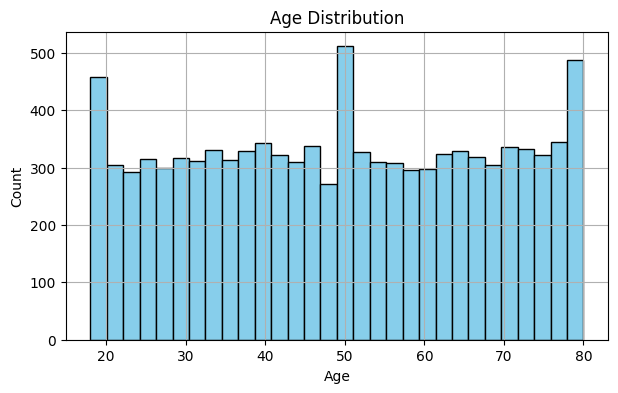

In [ ]:
# Age Distribution
plt.figure(figsize=(7,4))
df["Age"].hist(bins=30, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


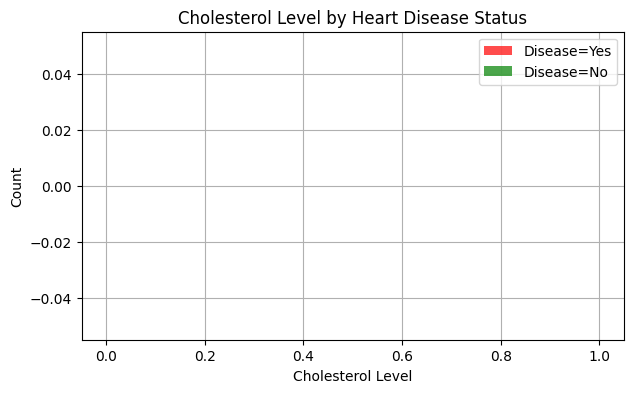

In [ ]:
# Cholesterol distribution by Heart Disease
plt.figure(figsize=(7,4))
df[df["Heart Disease Status"]=="Yes"]["Cholesterol Level"].hist(alpha=0.7, bins=30, label="Disease=Yes", color="red")
df[df["Heart Disease Status"]=="No"]["Cholesterol Level"].hist(alpha=0.7, bins=30, label="Disease=No", color="green")
plt.title("Cholesterol Level by Heart Disease Status")
plt.xlabel("Cholesterol Level")
plt.ylabel("Count")
plt.legend()
plt.show()


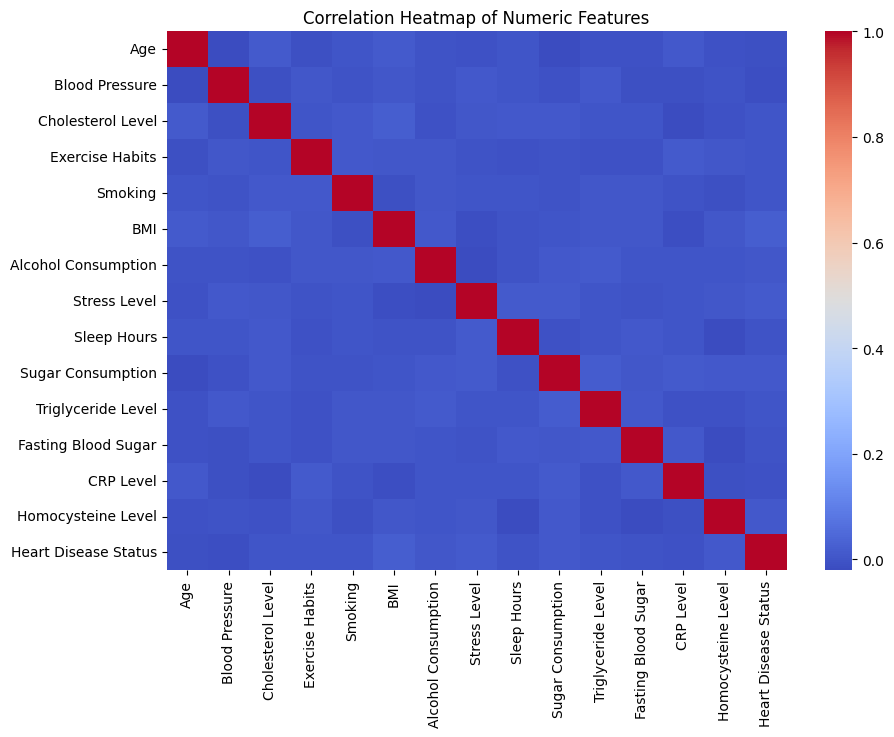

In [ ]:
# Correlation Heatmap (numeric features only)
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=["float64","int64"]).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

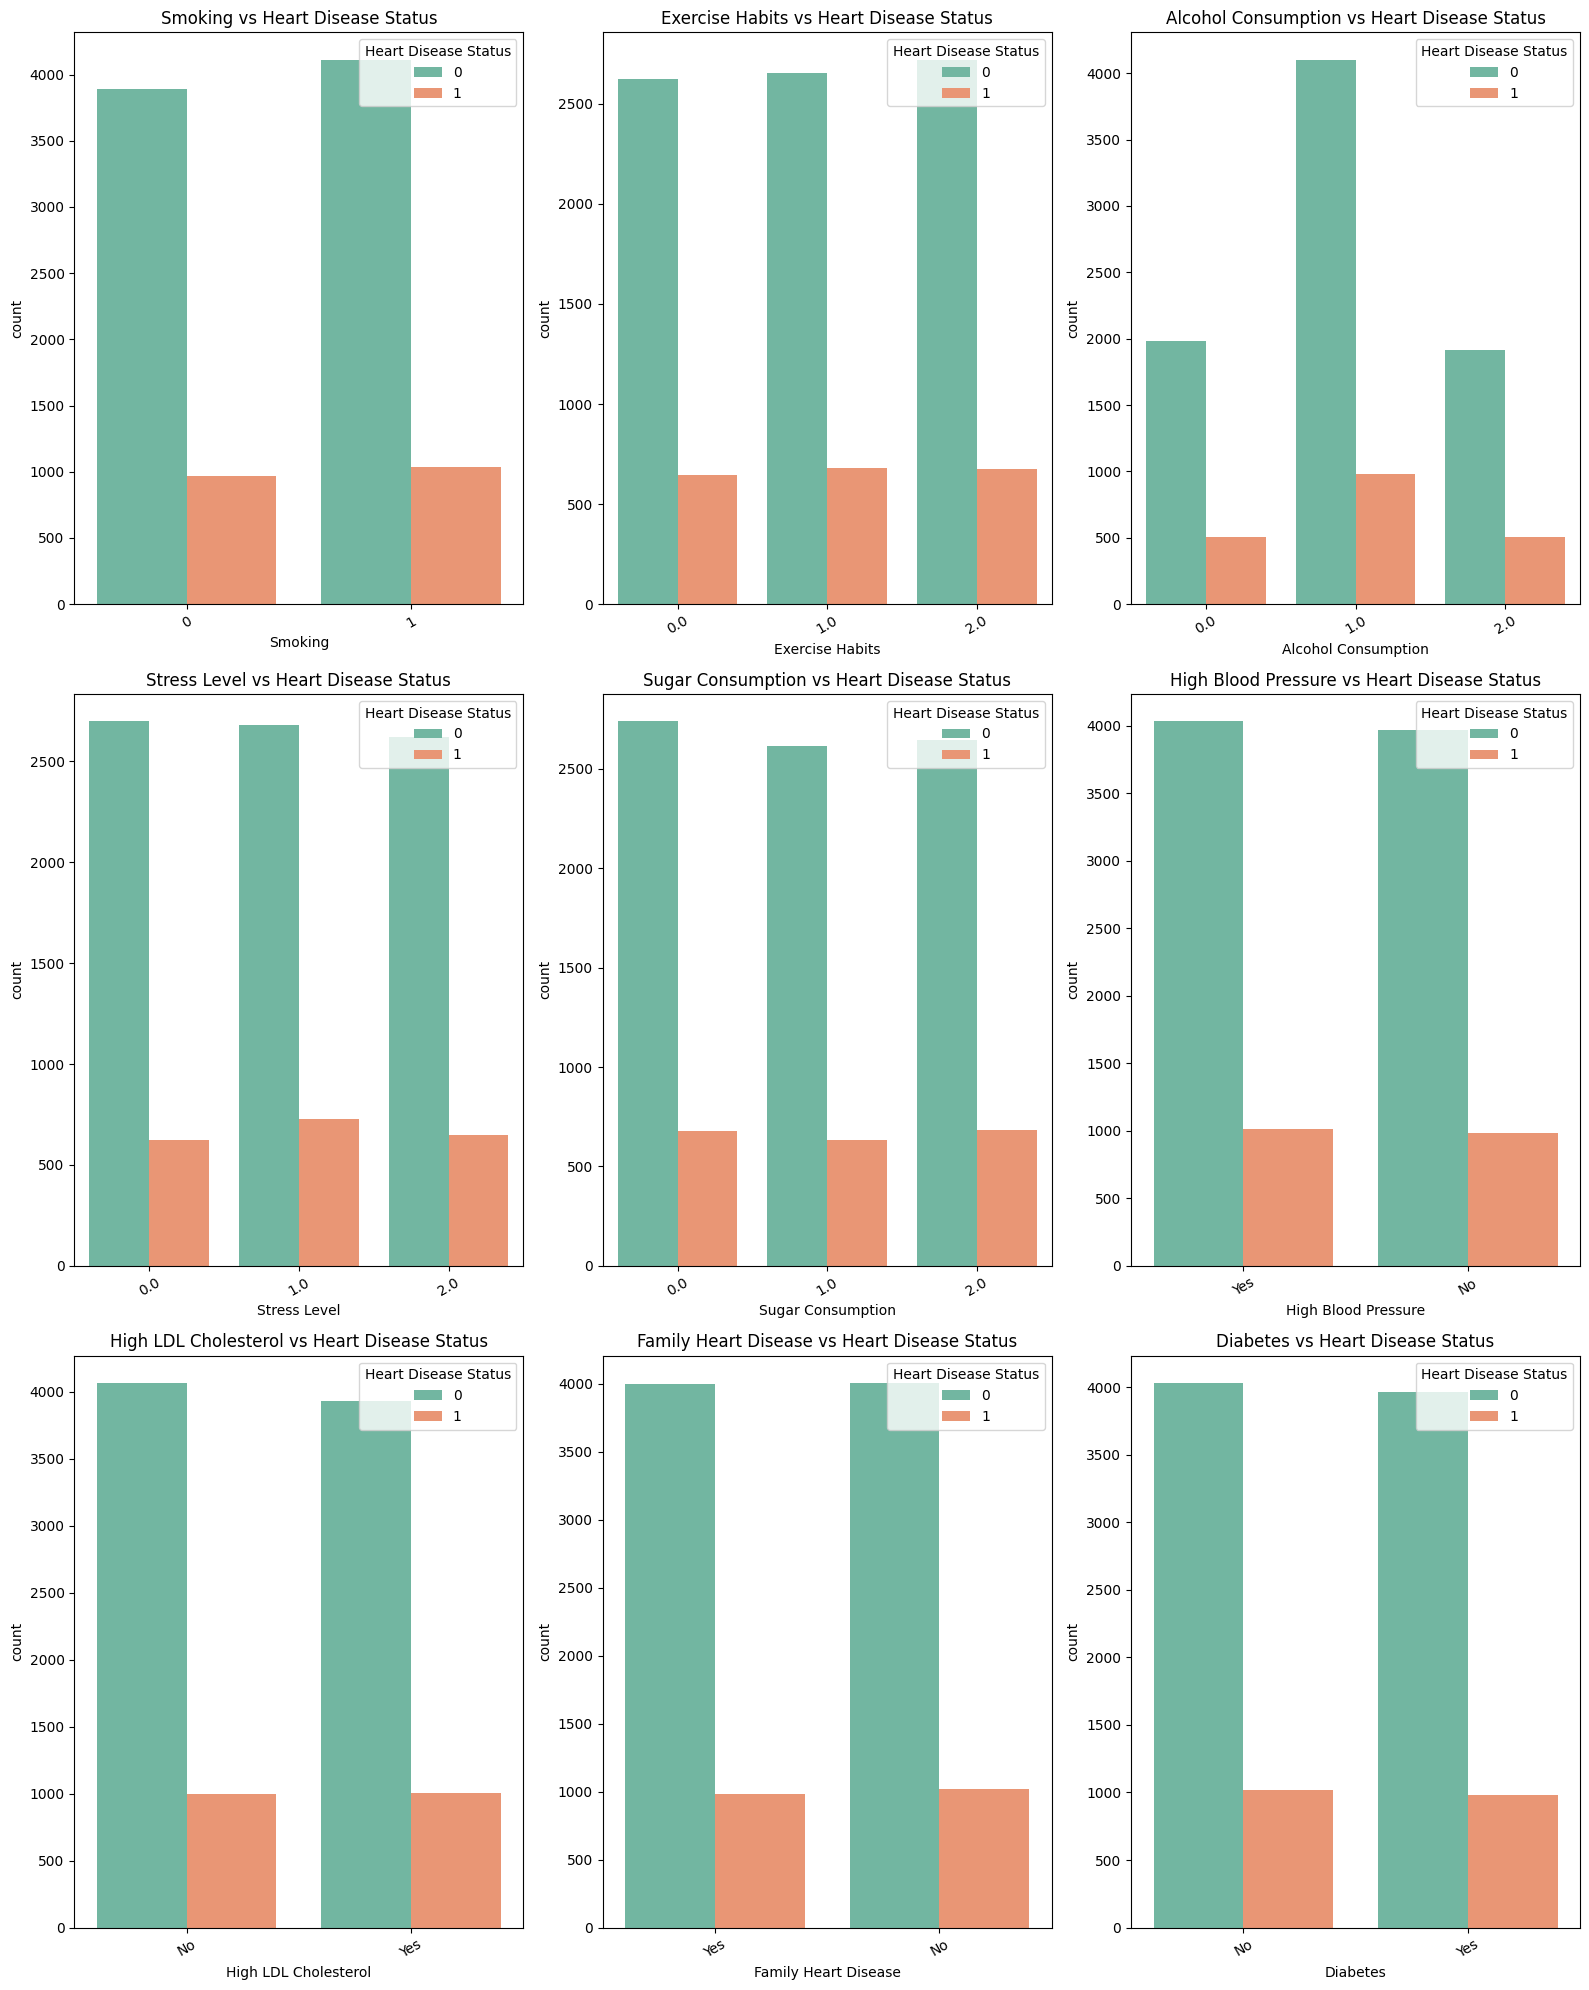

In [ ]:
# -------------------------------
# 2. Categorical Feature Visualizations
# -------------------------------

categorical_features = ["Smoking", "Exercise Habits", "Alcohol Consumption",
                        "Stress Level", "Sugar Consumption", "High Blood Pressure",
                        "High LDL Cholesterol", "Family Heart Disease", "Diabetes"]

plt.figure(figsize=(16, 20))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue="Heart Disease Status", palette="Set2")
    plt.title(f"{col} vs Heart Disease Status")
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

In [ ]:
# Features (X) and Target (y)
X = df.drop("Heart Disease Status", axis=1)   # target column should be 'target' in dataset
y = df["Heart Disease Status"]

Train-Test Split

In [ ]:
X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label.fit_transform(X_train[col])
        X_test[col] = label.transform(X_test[col])


In [ ]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression**

In [ ]:
#Build Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
#Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors=5) # Use KNeighborsClassifier
Knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# 4. Predict test data
y_pred = Knn.predict(X_test)

In [ ]:
# 5. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.7666666666666667


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# 4. Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# 5. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC # Import SVC

mod=SVC() # Use SVC
mod.fit(X_train, y_train)

SVC()

In [ ]:
# 4. Test / Predict
y_pred = model.predict(X_test)

In [ ]:
# 5. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.8


Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(
    criterion='entropy',    # You can also use 'gini'
    max_depth=5,            # Controls tree depth to avoid overfitting
    random_state=42
)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
# Step 8: Make Predictions
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.7987878787878788


[Text(0.4971590909090909, 0.9166666666666666, 'x[8] <= -0.322\nentropy = 0.722\nsamples = 6700\nvalue = [5360, 1340]'),
 Text(0.23863636363636365, 0.75, 'x[8] <= -0.547\nentropy = 0.682\nsamples = 2681\nvalue = [2196.0, 485.0]'),
 Text(0.3678977272727273, 0.8333333333333333, 'True  '),
 Text(0.11363636363636363, 0.5833333333333334, 'x[0] <= 0.45\nentropy = 0.7\nsamples = 2246\nvalue = [1821, 425]'),
 Text(0.06818181818181818, 0.4166666666666667, 'x[8] <= -0.549\nentropy = 0.654\nsamples = 1437\nvalue = [1195, 242]'),
 Text(0.045454545454545456, 0.25, 'x[8] <= -1.66\nentropy = 0.651\nsamples = 1435\nvalue = [1195.0, 240.0]'),
 Text(0.022727272727272728, 0.08333333333333333, 'entropy = 0.419\nsamples = 106\nvalue = [97, 9]'),
 Text(0.06818181818181818, 0.08333333333333333, 'entropy = 0.666\nsamples = 1329\nvalue = [1098, 231]'),
 Text(0.09090909090909091, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1590909090909091, 0.4166666666666667, 'x[17] <= 1.587\nentropy = 0.771\ns

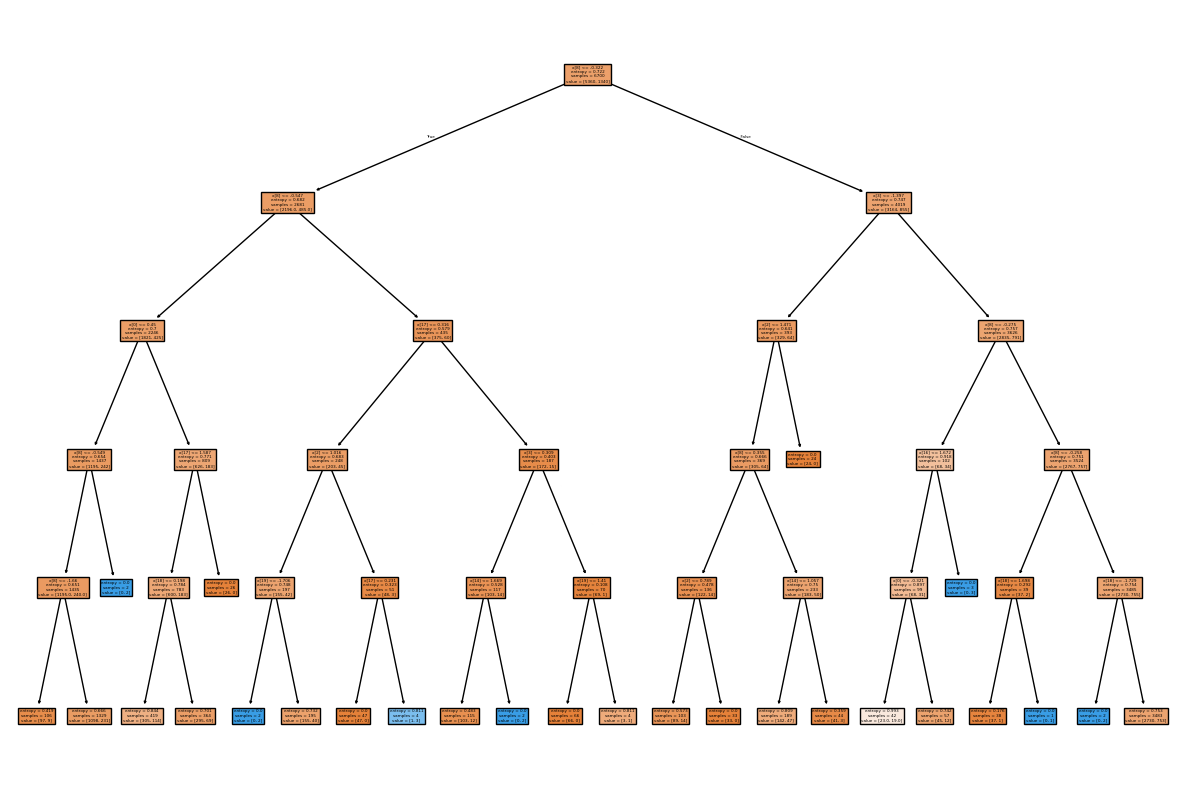

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

Random Forest Model

In [ ]:
model_ran = RandomForestClassifier(
    n_estimators=100,   # Number of trees
    criterion='entropy',
    max_depth=None,     # Expand until all leaves are pure or contain <min_samples_split samples
    random_state=42
)

In [ ]:
model_ran.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
# 4. Predict the test data
y_pred = model.predict(X_test)

In [ ]:
# 5. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.7987878787878788


Confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[2636    4]
 [ 660    0]]


In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7987878787878788
